# Using Keras for building a DNN

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from pandas import read_csv
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Load and prepare the data

In [2]:
myfile = 'diamond_prices.csv'
diamonds = read_csv(myfile)
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Splice the data to get predictive feature, feature vectors

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
encoder = LabelEncoder()
diamonds["cut"] = encoder.fit_transform(diamonds["cut"])
diamonds["color"] = encoder.fit_transform(diamonds["color"])
diamonds["clarity"] = encoder.fit_transform(diamonds["clarity"])

In [5]:
TARGET = 'price'
X_data = diamonds.iloc[:,1:].values
y_data = diamonds[TARGET].values

In [6]:
X_data

array([[2.  , 1.  , 3.  , ..., 3.95, 3.98, 2.43],
       [3.  , 1.  , 2.  , ..., 3.89, 3.84, 2.31],
       [1.  , 1.  , 4.  , ..., 4.05, 4.07, 2.31],
       ...,
       [4.  , 0.  , 2.  , ..., 5.66, 5.68, 3.56],
       [3.  , 4.  , 3.  , ..., 6.15, 6.12, 3.74],
       [2.  , 0.  , 3.  , ..., 5.83, 5.87, 3.64]])

In [7]:
y_data

array([ 326,  326,  327, ..., 2757, 2757, 2757], dtype=int64)

## 2. Splitting Data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=60)

## Number of Inputs

In [9]:
n_inputs = X_train.shape[1]

## 3. Build the DL model using Dense layers

In [10]:
model = tf.keras.models.Sequential()

# first hidden layer, you only need to set the input_dim for the first layer
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=n_inputs))
# second hidden layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
# third hidden layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
# output layer # for activation: If you don't specify anything, no activation is applied
model.add(tf.keras.layers.Dense(units=1))

## 4. Compile the model

In [11]:
model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mean_squared_error'])

## 5. Train the model

In [12]:
N_EPOCHS = 400
BATCH_SIZE = 128
model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/400
48546/48546 [==============================] - 2s 41us/step - loss: 854870.2177 - mean_squared_error: 854870.2177
Epoch 2/400
48546/48546 [==============================] - 1s 22us/step - loss: 5.1288 - mean_squared_error: 5.1288
Epoch 3/400
48546/48546 [==============================] - 1s 22us/step - loss: 0.9146 - mean_squared_error: 0.9146
Epoch 4/400
48546/48546 [==============================] - 1s 22us/step - loss: 1.3673 - mean_squared_error: 1.3673
Epoch 5/400
48546/48546 [==============================] - 1s 23us/step - loss: 6.3234 - mean_squared_error: 6.3234
Epoch 6/400
48546/48546 [==============================] - 1s 22us/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 7/400
48546/48546 [==============================] - 1s 23us/step - loss: 1.3100 - mean_squared_error: 1.3100
Epoch 8/400
48546/48546 [==============================] - 1s 22us/step - loss: 5.2690 - mean_squared_error: 5.2690
Epoch 9/400
48546/48546 [==============================] - 1s 

48546/48546 [==============================] - 1s 24us/step - loss: 16.0748 - mean_squared_error: 16.0748
Epoch 71/400
48546/48546 [==============================] - 1s 22us/step - loss: 557.7442 - mean_squared_error: 557.7442
Epoch 72/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 73/400
48546/48546 [==============================] - 1s 22us/step - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 74/400
48546/48546 [==============================] - 1s 22us/step - loss: 1.3228 - mean_squared_error: 1.3228
Epoch 75/400
48546/48546 [==============================] - 1s 23us/step - loss: 293.8951 - mean_squared_error: 293.8951
Epoch 76/400
48546/48546 [==============================] - 1s 22us/step - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 77/400
48546/48546 [==============================] - 1s 22us/step - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 78/400
48546/48546 [==============================] - 1s 23us

48546/48546 [==============================] - 1s 23us/step - loss: 24.8143 - mean_squared_error: 24.8143
Epoch 139/400
48546/48546 [==============================] - 1s 24us/step - loss: 261.0190 - mean_squared_error: 261.0190
Epoch 140/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 141/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 142/400
48546/48546 [==============================] - 1s 23us/step - loss: 8.4646 - mean_squared_error: 8.4646
Epoch 143/400
48546/48546 [==============================] - 1s 25us/step - loss: 91.4612 - mean_squared_error: 91.4612
Epoch 144/400
48546/48546 [==============================] - 1s 24us/step - loss: 45.6921 - mean_squared_error: 45.6921
Epoch 145/400
48546/48546 [==============================] - 1s 28us/step - loss: 40.6186 - mean_squared_error: 40.6186
Epoch 146/400
48546/48546 [==============================]

48546/48546 [==============================] - 1s 23us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 207/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 208/400
48546/48546 [==============================] - 1s 23us/step - loss: 756.1894 - mean_squared_error: 756.1894
Epoch 209/400
48546/48546 [==============================] - 1s 23us/step - loss: 136.0292 - mean_squared_error: 136.0292
Epoch 210/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 211/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 212/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 213/400
48546/48546 [==============================] - 1s 23us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 214/400
48546/48546 [==============================] - 1

48546/48546 [==============================] - 1s 27us/step - loss: 17.6039 - mean_squared_error: 17.6039
Epoch 274/400
48546/48546 [==============================] - 1s 26us/step - loss: 0.1856 - mean_squared_error: 0.1856
Epoch 275/400
48546/48546 [==============================] - 1s 28us/step - loss: 88.7213 - mean_squared_error: 88.7213
Epoch 276/400
48546/48546 [==============================] - 1s 27us/step - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 277/400
48546/48546 [==============================] - 2s 34us/step - loss: 190.8842 - mean_squared_error: 190.8842
Epoch 278/400
48546/48546 [==============================] - 1s 25us/step - loss: 6.2893 - mean_squared_error: 6.2893
Epoch 279/400
48546/48546 [==============================] - 1s 30us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 280/400
48546/48546 [==============================] - 1s 28us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 281/400
48546/48546 [==============================] - 1

48546/48546 [==============================] - 1s 25us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 342/400
48546/48546 [==============================] - 1s 24us/step - loss: 62.7673 - mean_squared_error: 62.7673
Epoch 343/400
48546/48546 [==============================] - 1s 24us/step - loss: 33.5770 - mean_squared_error: 33.5770
Epoch 344/400
48546/48546 [==============================] - 1s 25us/step - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 345/400
48546/48546 [==============================] - 1s 25us/step - loss: 130.8831 - mean_squared_error: 130.8831
Epoch 346/400
48546/48546 [==============================] - 1s 25us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 347/400
48546/48546 [==============================] - 1s 24us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 348/400
48546/48546 [==============================] - 1s 24us/step - loss: 124.4147 - mean_squared_error: 124.4147
Epoch 349/400
48546/48546 [==============================]

## 6. Visualize/analyze the results of the model

In [13]:
## Getting the predictions from the model
predictions = model.predict(X_test).flatten()

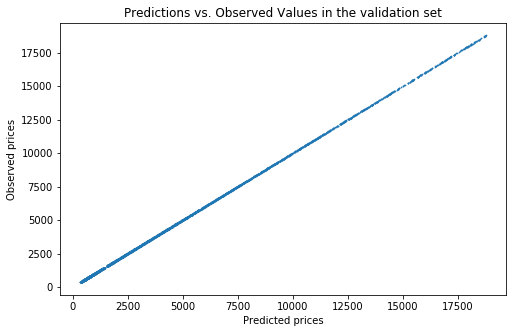

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=predictions, y=y_test, s=0.5)
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices')
ax.set_title("Predictions vs. Observed Values in the validation set");

# Thank you

### Shout out to our sponsor



![Deep Analytics](img/Deep_Analytics.png)

visit their <a href="http://deepanalytics.ai/">website</a>

Like their <a href="https://www.facebook.com/DeepAnalyticsAI/">Facebook page</a>


![School of AI](img/School_of_ai_logo.png)

<a href="https://www.facebook.com/groups/harareschoolofai/">Join our Facebook Group</a>